## Python으로 데이터 불러오기

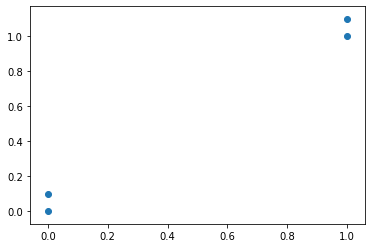

In [3]:
from numpy import *
import operator

def createDataset():
    group=array([[1,1.1],[1,1],[0,0],[0,0.1]]) # trainset #2차원
    labels=['A','A','B','B'] #labels
    return group, labels

group,labels =createDataset()

%matplotlib inline

from numpy import array
import matplotlib
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(group[:,0],group[:,1])
plt.show()

## KNN 분류 알고리즘 실행하기
- K-최근접 이웃 알고리즘

In [21]:
def classify0(inX, dataSet, labels, k):
    dataSetSize=dataSet.shape[0]
    diffMat=tile(inX,(dataSetSize,1))-dataSet
    sqDiffMat=diffMat**2
    sqDistances=sqDiffMat.sum(axis=1)
    distances=sqDistances**0.5
    sortedDistIndicies=distances.argsort()
    classCount={}
    for i in range(k):
        votellabel=labels[sortedDistIndicies[i]]
        classCount[votellabel]=classCount.get(votellabel,0)+1
    sortedClassCount=sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]
    

In [3]:
classify0([0,0],group,labels,3)

'B'

## 예제 : KNN을 이용하여 데이트 사이트의 만남 주선 개선하기
- 수집 : 제공된 텍스트 파일 (datingTestSet.txt)
- 준비 : 파이썬에서 텍스트 파일 구문 분석하기
- 분석 : 데이터를 2D 플롯으로 만들기 위해 matplotlib 사용하기
- 훈련 : N/A
- 테스트 : 테스트용 예제 데이터의 일부를 사용하기 위한 함수 작성
- 사용 : 사용자가 입력한 몇 가지 데이터를 토대로 누구를 좋아하게 될 것인지를 예측하는 데 사용할 수 있는 간단한 커맨스 라인 프로그램 구축

In [4]:
def file2matrix(filename):
    love_dict={'largeDoses':3,'smallDoses':2,'didntLike':1}
    fr=open(filename)
    array0Lines=fr.readlines()
    numberOfLines=len(array0Lines)
    returnMat=zeros((numberOfLines,3))
    classLabelVector=[]
    index=0
    for line in array0Lines:
        line=line.strip()
        listFromLine=line.split('\t')
        returnMat[index,:]=listFromLine[0:3]
        if(listFromLine[-1].isdigit()): #코드의 유연성과 관련된 문제
            classLabelVector.append(int(listFromLine[-1]))
        else:
            classLabelVector.append(love_dict.get(listFromLine[-1]))
        index+=1
    return returnMat, classLabelVector
                                

In [5]:
datingDataMat, datingLabels=file2matrix('./data/datingTestSet.txt')

In [6]:
datingDataMat

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [7]:
datingLabels[0:20]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

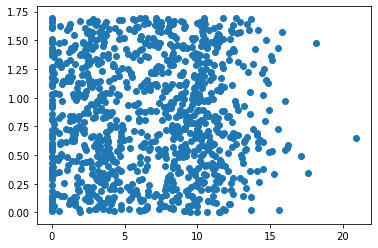

In [8]:
from numpy import array
import matplotlib
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(datingDataMat[:,1],datingDataMat[:,2]) #x:게임,y:아이스크림
plt.show()

In [9]:
def autoNorm(dataSet):
    minVals=dataSet.min(0)
    maxVals=dataSet.max(0)
    ranges=maxVals-minVals
    normDataSet=zeros(shape(dataSet))
    m=dataSet.shape[0]
    normDataSet=dataSet-tile(minVals,(m,1))
    normDataSet=normDataSet/tile(ranges,(m,1))
    return normDataSet,ranges,minVals

In [10]:
normMat, ranges, minVals=autoNorm(datingDataMat)

In [11]:
normMat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [12]:
ranges

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

In [13]:
minVals

array([0.      , 0.      , 0.001156])

In [19]:
def datingClassTest():
    hoRatio=0.10 #맨위에서부터 몇개까지 error count할 것인가
    datingDataMat,datingLabels=file2matrix('./data/datingTestSet.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m=normMat.shape[0]
    numTestVecs=int(m*hoRatio)
    errorCount=0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3) #knn알고리즘 사용 #k=3
        print("the classifier came back with: {}, the real answer is {}".format(classifierResult,datingLabels[i]))
        if(classifierResult != datingLabels[i]):errorCount+=1.0
    print("the total error rate is:{}".format(errorCount/float(numTestVecs)))
    print("the error count:{}".format(errorCount))

In [22]:
datingClassTest()

the classifier came back with: 3, the real answer is 3
the classifier came back with: 2, the real answer is 2
the classifier came back with: 1, the real answer is 1
the classifier came back with: 1, the real answer is 1
the classifier came back with: 1, the real answer is 1
the classifier came back with: 1, the real answer is 1
the classifier came back with: 3, the real answer is 3
the classifier came back with: 3, the real answer is 3
the classifier came back with: 1, the real answer is 1
the classifier came back with: 3, the real answer is 3
the classifier came back with: 1, the real answer is 1
the classifier came back with: 1, the real answer is 1
the classifier came back with: 2, the real answer is 2
the classifier came back with: 1, the real answer is 1
the classifier came back with: 1, the real answer is 1
the classifier came back with: 1, the real answer is 1
the classifier came back with: 1, the real answer is 1
the classifier came back with: 1, the real answer is 1
the classi

In [23]:
def classifyPerson():
    resultList=['not at all','in small doses','in large doses']
    percentTats=float(input('percentage of time spent playing video games?'))
    ffMiles=float(input("frequent filer miles earned per year?"))
    iceCream=float(input("liters of ice cream consumed per year?"))
    datingDataMat, datingLabels = file2matrix('./data/datingTestSet.txt')
    normMat, ranges, minVals=autoNorm(datingDataMat)
    inArr=array([[ffMiles, percentTats, iceCream,]])
    classifierResult=classify0((inArr-minVals)/ranges, normMat, datingLabels,3)
    print('You will probably like this person:{}'.format(resultList[classifierResult-1]))

In [24]:
classifyPerson()

percentage of time spent playing video games?0
frequent filer miles earned per year?1000
liters of ice cream consumed per year?1
You will probably like this person:in small doses


In [26]:
datingDataMat,datingLabels=file2matrix('./data/datingTestSet.txt')
normMat, ranges, minVals = autoNorm(datingDataMat)
m=normMat.shape[0]
m # 전체 데이터 갯수

1000

In [27]:
hoRatio=0.10
numTestVecs=int(m*hoRatio)
numTestVecs

100

In [28]:
errorCount=0.0
i=1
classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
classifierResult

2

In [29]:
normMat[1,:]

array([0.15873259, 0.34195467, 0.98724416])

In [30]:
normMat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [31]:
numTestVecs

100

In [32]:
range(numTestVecs)

range(0, 100)

In [33]:
array([1,2,3,])

array([1, 2, 3])

In [34]:
array([0,0,0])

array([0, 0, 0])

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('./data/datingTestSet.txt','\t',header=None)

In [3]:
df.head(5)

,0,1,2,3
0,40920,8.326976,0.953952,largeDoses
1,14488,7.153469,1.673904,smallDoses
2,26052,1.441871,0.805124,didntLike
3,75136,13.147394,0.428964,didntLike
4,38344,1.669788,0.134296,didntLike


In [4]:
def dataframeft(filename):
    love_dict={'didntLike':1, 'smallDoses':2, 'largeDoses':3}
    df=pd.read_csv(filename,'\t',header=None)
    returndf=df[[0,1,2]]
    #if(df[3].isdigit) 여기 해놓기
    return returndf

In [5]:
df.shape[0]

1000

In [6]:
f0Lines=df.shape[0]
returndf=DataFrame(index=range(f0Lines),columns=range(3)) # 비어있는 dataframe 생성

In [7]:
from math import log
import operator

In [8]:
def createDataSet():
    dataset=[[1,1,'yes'],
            [1,1,'yes'],
            [1,0,'no'],
            [0,1,'no'],
            [0,1,'no']]
    features=['no surfacing','flippers']
    return dataset, features

In [9]:
def calcShannonEnt(dataset):
    numEntries=len(dataset)
    labelCounts={}
    for featVec in dataset:
        Label=featVec[-1]
        if Label not in labelCounts.keys():
            labelCounts[Label]=0
        labelCounts[Label]+=1
    shannonEnt=0.0
    for key in labelCounts:
        prob=float(labelCounts[key])/numEntries
        shannonEnt-=prob*log(prob,2)
    return shannonEnt

In [10]:
myDat, features=createDataSet()
calcShannonEnt(myDat)

0.9709505944546686

In [11]:
myDat[0][-1]='maybe'
calcShannonEnt(myDat)

1.3709505944546687

In [12]:
def splitDataset(dataSet,axis,value):
    retDataSet=[]
    for featVec in dataSet:
        if featVec[axis]==value:
            reducedFeatVec=featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [13]:
splitDataset(myDat,0,0)

[[1, 'no'], [1, 'no']]

In [14]:
splitDataset(myDat,0,1)

[[1, 'maybe'], [1, 'yes'], [0, 'no']]

In [15]:
splitDataset(myDat,1,0)

[[1, 'no']]

In [16]:
splitDataset(myDat,1,1)

[[1, 'maybe'], [1, 'yes'], [0, 'no'], [0, 'no']]

In [17]:
def chooseBestFeatureToSplit(dataset):
    numFeatures=len(dataset[0])-1
    baseEntropy=calcShannonEnt(dataset)
    bestInfoGain=0.0
    bestFeature=-1
    for i in range(numFeatures):
        featList=[example[i] for example in dataset]
        uniqueVals=set(featList)
        newEntropy=0.0
        for value in uniqueVals:
            subDataset=splitDataset(dataset,i,value)
            prob=len(subDataset)/float(len(dataset))
            newEntropy+=prob*calcShannonEnt(subDataset)
        infoGain = baseEntropy - newEntropy
        if (infoGain>bestInfoGain):
            bestInfoGain=infoGain
            bestFeature=i
    return bestFeature

In [18]:
chooseBestFeatureToSplit(myDat)

0

In [19]:
def majorityCnt(classList):
    classCount={}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote]=0
        classCount[vote] +=1
    sortedClassCount=sorte(classCount.items(),key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]

In [20]:
def createTree(dataset,labels):
    classList=[example[-1] for example in dataset]
    if classList.count(classList[0])==len(classList):
        return classList[0]
    if len(dataset[0])==1:
        return majorityCnt(classList)
    bestFeat=chooseBestFeatureToSplit(dataset)
    bestFeatLabel=labels(bestFeat)
    myTree={bestFeatLabel:{}}
    del(labels[bestFeat])
    featValues=[example[bestFeat] for example in dataset]
    uniqueVals=set(featValues)
    for value in uniqueVals:
        subLabels=labels[:]
        myTree[bestFeatLabel][value]=createTree(splitDataset(dataSet,bestFeat,value),subLabels)
    return myTree


In [21]:
def retrieveTree(i):
    listOfTrees=[{'no surfacing':{0:'no',1:{'flippers':{0:'no',1:'yes'}}}},
                  {'no surfacing':{0:'no',1:{'flippers':{0:{'head':{0:'no',1:'yes'}},1:'no'}}}}]
    return listOfTrees[i]

def classify(inputTree,featLabels,testVec):
    firstStr=list(inputTree)[0]
    secondDict=inputTree[firstStr]
    featIndex=featLabels.index(firstStr)
    key=testVec[featIndex]
    ValueOfFeat=secondDict[key]
    if isinstance(ValueOfFeat,dict):
        classLabel=classify(ValueOfFeat,featLabels,testVec)
    else: classLabel=ValueOfFeat
    return classLabel

In [22]:
myTree=retrieveTree(0)

In [23]:
classify(myTree,features,[1,0])

'no'

In [24]:
classify(myTree,features,[1,1])

'yes'

In [25]:
def createDataSet():
    dataset=[[1,1,'yes'],
            [1,1,'yes'],
            [1,0,'no'],
            [0,1,'no'],
            [0,1,'no']]
    features=['no surfacing','flippers']
    return dataset, features

In [26]:
dataset, features = createDataSet()
dataset

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [27]:
numEntries=len(dataset)
numEntries

5

In [28]:
labelCounts={}
labelCounts

{}

In [29]:
for featVec in dataset:
    Label=featVec[-1]
    if Label not in labelCounts.keys():
        labelCounts[Label]=0
    labelCounts[Label]+=1
    print(labelCounts)

{'yes': 1}
{'yes': 2}
{'yes': 2, 'no': 1}
{'yes': 2, 'no': 2}
{'yes': 2, 'no': 3}


In [30]:
shannonEnt=0.0

In [31]:
for key in labelCounts:
    prob=float(labelCounts[key])/numEntries
    shannonEnt-=prob*log(prob,2)
    print(shannonEnt)

0.5287712379549449
0.9709505944546686


In [32]:
key='yes'
prob=float(labelCounts[key])/numEntries
prob

0.4

In [33]:
shannonEnt-=prob*log(prob,2)
shannonEnt

1.4997218324096133

In [34]:
retDataSet=[]
retDataSet

[]

In [35]:
dataSet=myDat
axis=0
value=0
for featVec in dataSet:
    if featVec[axis]==value:
        reducedFeatVec=featVec[:axis]
        reducedFeatVec.extend(featVec[axis+1:])
        retDataSet.append(reducedFeatVec)
        print(retDataSet)

[[1, 'no']]
[[1, 'no'], [1, 'no']]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(seed=1)
X_min=4
X_max=30
X_n=16
X=5+25*np.random.rand(X_n)
Prm_c=[170,108,0.2]
T=Prm_c[0]-Prm_c[1]*np.exp(-Prm_c[2]*X)+4*np.random.randn(X_n)
np.savez('ch5_data.npz',X=X,X_min=X_min,X_max=X_max,X_n=X_n,T=T)

In [2]:
print(np.round(X,2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]


In [3]:
print(np.round(T,2))

[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


In [4]:
X

array([15.42555012, 23.00811234,  5.00285937, 12.55831432,  8.66889727,
        7.30846487,  9.65650528, 13.63901818, 14.91918686, 18.47041835,
       15.47986286, 22.13048751, 10.11130624, 26.95293591,  5.68468983,
       21.76168775])

In [5]:
T

array([170.91013145, 160.67559882, 129.00206616, 159.70139552,
       155.46058905, 140.56134369, 153.65466385, 159.42939554,
       164.70423898, 169.64527574, 160.71257522, 173.28709855,
       159.31193249, 171.51757345, 138.9570433 , 165.8744074 ])

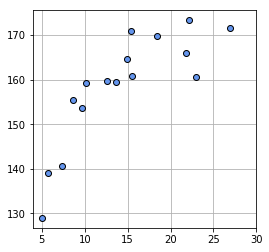

In [6]:
plt.figure(figsize=(4,4))
plt.plot(X,T,marker='o',linestyle='None',
        markeredgecolor='black',color='cornflowerblue')
plt.xlim(X_min,X_max)
plt.grid(True)
plt.show()

In [11]:
from mpl_toolkits.mplot3d import Axes3D

def mse_line(x,t,w):
    y=w[0]*x+w[1]
    mse=np.mean((y-t)**2)
    return mse

In [13]:
xn=100 #등고선 표시 해상도
w0_range=[-25,25]
w1_range=[120,170]
x0=np.linspace(w0_range[0],w0_range[1],xn)
x1=np.linspace(w1_range[0],w1_range[1],xn)
xx0,xx1=np.meshgrid(x0,x1)
J=np.zeros((len(x0),len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1,i0]=mse_line(X,T,(x0[i0],x1[i1]))

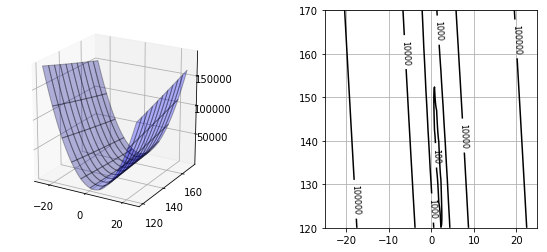

In [14]:
plt.figure(figsize=(9.5,4))
plt.subplots_adjust(wspace=0.5)

ax=plt.subplot(1,2,1,projection='3d')
ax.plot_surface(xx0,xx1,J,rstride=10,cstride=10,alpha=0.3,
               color='blue',edgecolor='black')
ax.set_xticks([-20,0,20])
ax.set_yticks([120,140,160])
ax.view_init(20,-60)

plt.subplot(1,2,2)
cont=plt.contour(xx0,xx1,J,30,colors='black',
                levels=[100,1000,10000,100000])
cont.clabel(fmt='%1.0f',fontsize=8)
plt.grid(True)
plt.show()

In [25]:
def dmse_line(x,t,w):
    y=w[0]*x+w[1]
    d_w0=2*np.mean((y-t)*x)
    d_w1=2*np.mean((y-t))
    return d_w0,d_w1

In [26]:
d_w=dmse_line(X,T,[10,165])
print(np.round(d_w,1))

[5046.3  301.8]


In [27]:
def fit_line_num(x,t):
    w_init=[10.0,165.0] #초기 매개 변수
    alpha=0.001 #학습률
    i_max=100000 #반복의 최대 수
    eps=0.1 #반복을 종료 기울기의 절대값의 한계
    w_i=np.zeros([i_max,2])
    w_i[0,:]=w_init
    for i in range(1,i_max):
        dmse=dmse_line(x,t,w_i[i-1])
        w_i[i,0]=w_i[i-1,0]-alpha*dmse[0]
        w_i[i,1]=w_i[i-1,1]-alpha*dmse[1]
        if max(np.absolute(dmse))<eps:
            break
    w0=w_i[i,0]
    w1=w_i[i,1]
    w_i=w_i[:i,:]
    return w0,w1,dmse, w_i

반복 횟수 13820
W=[1.539947,136.176160]
dMSE=[-0.005794,0.099991]
MSE=49.027452


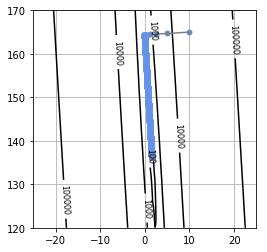

In [36]:
plt.figure(figsize=(4,4))
xn=100 #등고선 표시 해상도
w0_range=[-25,25]
w1_range=[120,170]
x0=np.linspace(w0_range[0],w0_range[1],xn)
x1=np.linspace(w1_range[0],w1_range[1],xn)
xx0,xx1=np.meshgrid(x0,x1)
J=np.zeros((len(x0),len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1,i0]=mse_line(X,T,(x0[i0],x1[i1]))
cont=plt.contour(xx0,xx1,J,30,colors='black',
                levels=[100,1000,10000,100000])
cont.clabel(fmt='%1.0f',fontsize=8)
plt.grid(True)

W0, W1, dMSE, W_history = fit_line_num(X,T)

print('반복 횟수 {0}'.format(W_history.shape[0]))
print('W=[{0:.6f},{1:.6f}]'.format(W0,W1))
print('dMSE=[{0:.6f},{1:.6f}]'.format(dMSE[0],dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X,T,[W0,W1])))
plt.plot(W_history[:,0],W_history[:,1],'.-',
        color='gray',markersize=10,markeredgecolor='cornflowerblue')
plt.show()

In [32]:
def show_line(w):
    xb=np.linspace(X_min,X_max,100)
    y=w[0]*xb+w[1]
    plt.plot(xb,y,color=(.5,.5,.5),linewidth=4)

w0=1.540,w1=136.176
SD=7.002cm


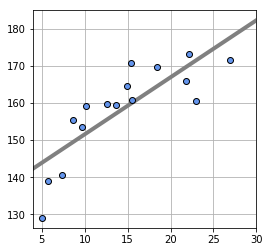

In [35]:
plt.figure(figsize=(4,4))
W=np.array([W0,W1])
mse=mse_line(X,T,W)
print("w0={0:.3f},w1={1:.3f}".format(W0,W1))
print("SD={0:.3f}cm".format(np.sqrt(mse)))
show_line(W)
plt.plot(X,T,marker='o',linestyle='None',
        color='cornflowerblue',markeredgecolor='black')
plt.xlim(X_min,X_max)
plt.grid(True)
plt.show()

In [49]:
featVec=[1,0,'yes']
reducedFeatVec=featVec[:1]
reducedFeatVec

[1]

In [46]:
reducedFeatVec.extend(featVec[2:])
reducedFeatVec

[1, 'yes']